# SVR

<p style='text-align: justify;'><b>SVR</b> por sus siglas en inglés provenientes de <b>Support Vector Regression</b> es un algoritmo de regresión basado en las máquinas de soporte vectorial utilizados para clasificar elementos de diferentes conjuntos. En la siguiente sección se explicara cómo funciona el algoritmo SVR con datos lineales, pero es importante saber que este algoritmo también funciona para datos no lineales.</p>  

### Funcionamiento de una SVR
<p style='text-align: justify;'>Imaginemos que existe un conjunto de datos como el que se presenta a continuación, donde se puede observar que los datos presentan un comportamiento similar a un modelo lineal.</p>   
<center><img src="img/SVR1.png" width = "70%"></center>

<p style='text-align: justify;'>El primer paso que debemos realizar es encontrar el modelo lineal que mejor describa el comportamiento de este conjunto de datos, en el contexto de las SVR a nuestra línea la llamaremos Hiperplano. En el contexto de problemas donde los datos no son lineales el hiperplano que mejor representa el comportamiento de los datos será más complejo que una sencilla línea, pero la idea central seguirá siendo la misma.</p>   
<center><img src="img/SVR2.png" width = "70%"></center>
<p style='text-align: justify;'>Continuando con nuestro ejemplo la recta que encontremos tendrá una ecuación de la forma:</p>
\begin{equation}
y = m x + b
\end{equation}

<p style='text-align: justify;'>Nuestro siguiente paso consiste en encontrar dos bandas paralelas al hiperplano donde es necesario que entre ambas cubran la mayor cantidad de datos. Estas bandas son conocidas como vectores de apoyo o de soporte.</p>    
<center><img src="img/SVR3.png" width = "70%"></center>
<p style='text-align: justify;'>Continuando con nuestro ejemplo las bandas que paralelas a nuestro hiperplano tendrán las siguientes ecuaciones:</p>
\begin{equation}
y = m x + b + \epsilon \\\
y = m x + b - \epsilon
\end{equation}

<p style='text-align: justify;'>En nuestra figura es posible observar cómo las bandas propuestas no cubren en la totalidad a los datos y existen dos datos que están fuera. Estos datos son conocidos como errores y son datos que el algoritmo tomará en cuenta para mejorar su desempeño. En nuestro ejemplo donde se presentan datos lineales se utiliza la siguiente formula que controla el comportamiento de la SVR:</p>
<center><img src="img/SVR4.png" width = "50%"></center>
<p style='text-align: justify;'>En nuestra formula se relacionan muchas variables diferentes, <b>w</b> es la magnitud del hiperplano, <b>C</b> es una constante (Que debe ser mayor a cero) que se encarga de controlar el equilibrio entre la regularidad de la función y cuanto toleraremos las desviaciones fuera de las bandas de soporte y las variables <b>Xi</b> las cuales controlan el error cometido por la función de regresión al aproximar las bandas.</p>

In [1]:
from sklearn.datasets import load_boston

# Cargamos un conjunto de datos
boston_dataset = load_boston()
# Se carga con pandas para tratamiento posterior
import pandas as pd
df = pd.DataFrame(boston_dataset.data,columns=boston_dataset.feature_names)
# Agregamos la variable de respuesta
df['MEDV'] = boston_dataset.target[df.index]
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [2]:
df.corr()["MEDV"].sort_values()

LSTAT     -0.737663
PTRATIO   -0.507787
INDUS     -0.483725
TAX       -0.468536
NOX       -0.427321
CRIM      -0.388305
RAD       -0.381626
AGE       -0.376955
CHAS       0.175260
DIS        0.249929
B          0.333461
ZN         0.360445
RM         0.695360
MEDV       1.000000
Name: MEDV, dtype: float64

In [3]:
# Preparamos datos
X = df["LSTAT"].values.reshape(-1, 1)
y = df["MEDV"].values.reshape(-1, 1)

In [5]:
from sklearn.preprocessing import MinMaxScaler
X_scaler = MinMaxScaler() #Se escala con el maximo y el minimo
y_scaler = MinMaxScaler()
X = X_scaler.fit_transform(X)
y = y_scaler.fit_transform(y)

In [6]:
# Creamos un split de datos
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=100)

## Documentación:
- https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html#sklearn.svm.SVR

## Tips de uso:
- https://scikit-learn.org/stable/modules/svm.html#tips-on-practical-use

In [7]:
from sklearn.svm import SVR

svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
svr_lin = SVR(kernel='linear', C=100, gamma='auto')
svr_poly = SVR(kernel='poly', C=100, gamma='auto', degree=3, epsilon=.1, coef0=1)

In [8]:
# Creando el modelo y entrenando
reg = svr_rbf.fit(X_train,y_train.reshape(-1))
# Prediciendo valores de entrenamiento
y_train_hat = svr_rbf.predict(X_train)
# Prediciendo valores de validación
y_test_hat = svr_rbf.predict(X_test)

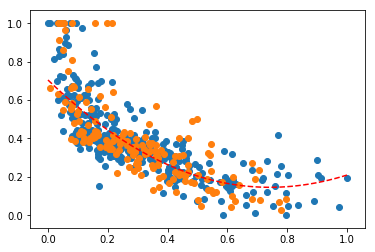

In [9]:
import matplotlib.pyplot as plt
import numpy as np
# Le decimos a jupyter que grafique en  el cuaderno
%matplotlib inline
# Creamos un scatter plot con los datos de entrenamiento
plt.scatter(X_train, y_train)
# Creamos un scatter plot con los datos de validación
plt.scatter(X_test, y_test)
# En X_plot guardamos valores distribuidos entre 0 y 1
X_plot = np.linspace(0,1).reshape(-1, 1)
# Con el modelo predecimos X_plot
# X_plot_poly = poly.fit_transform(X_plot)
y_plot = svr_rbf.predict(X_plot)
# Graficamos el modelo
plt.plot(X_plot, y_plot,"r--");

In [10]:
from sklearn.metrics import r2_score
# Calculamos el error
print("Entrenamiento", r2_score(y_train, y_train_hat))
print("Prueba", r2_score(y_test, y_test_hat))

Entrenamiento 0.6549935676752728
Prueba 0.5959815171361583


In [11]:
# Creando el modelo y entrenando
reg = svr_lin.fit(X_train,y_train.reshape(-1))
# Prediciendo valores de entrenamiento
y_train_hat = svr_lin.predict(X_train)
# Prediciendo valores de validación
y_test_hat = svr_lin.predict(X_test)

Entrenamiento 0.5427835029461929
Prueba 0.5153691412881067


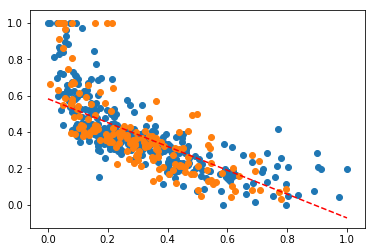

In [12]:
# Creamos un scatter plot con los datos de entrenamiento
plt.scatter(X_train, y_train)
# Creamos un scatter plot con los datos de validación
plt.scatter(X_test, y_test)
# En X_plot guardamos valores distribuidos entre 0 y 40
X_plot = np.linspace(0,1).reshape(-1, 1)
# Con el modelo predecimos X_plot
# X_plot_poly = poly.fit_transform(X_plot)
y_plot = svr_lin.predict(X_plot)
# Graficamos el modelo
plt.plot(X_plot, y_plot,"r--")

# Calculamos el error
print("Entrenamiento", r2_score(y_train, y_train_hat))
print("Prueba", r2_score(y_test, y_test_hat))

In [13]:
# Creando el modelo y entrenando
svr_poly.fit(X_train,y_train.reshape(-1))
# Prediciendo valores de entrenamiento
y_train_hat = svr_poly.predict(X_train)
# Prediciendo valores de validación
y_test_hat = svr_poly.predict(X_test)

Entrenamiento 0.6807594509701671
Prueba 0.6128901480469284


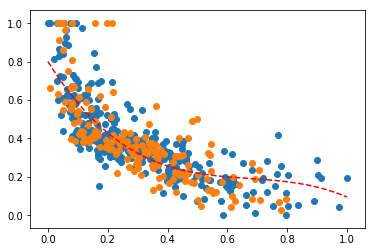

In [14]:
# Creamos un scatter plot con los datos de entrenamiento
plt.scatter(X_train, y_train)
# Creamos un scatter plot con los datos de validación
plt.scatter(X_test, y_test)
# En X_plot guardamos valores distribuidos entre 0 y 40
X_plot = np.linspace(0,1).reshape(-1, 1)
# Con el modelo predecimos X_plot
# X_plot_poly = poly.fit_transform(X_plot)
y_plot = svr_poly.predict(X_plot)
# Graficamos el modelo
plt.plot(X_plot, y_plot,"r--")

# Calculamos el error
print("Entrenamiento", r2_score(y_train, y_train_hat))
print("Prueba", r2_score(y_test, y_test_hat))

RBF Entrenamiento 0.6549935676752728
RBF Prueba 0.5959815171361583
Linear Entrenamiento 0.5427835029461929
Linear Prueba 0.5153691412881067
Poly Entrenamiento 0.6807594509701671
Poly Prueba 0.6128901480469284


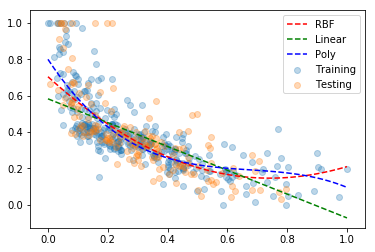

In [15]:
from sklearn.svm import SVR

svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
svr_lin = SVR(kernel='linear', C=100, gamma='auto')
svr_poly = SVR(kernel='poly', C=100, gamma='auto', degree=3, epsilon=.1, coef0=1)

# Creamos un scatter plot con los datos de entrenamiento
plt.scatter(X_train, y_train,label="Training",alpha=0.3)
# Creamos un scatter plot con los datos de validación
plt.scatter(X_test, y_test, label="Testing",alpha=0.3)
# En X_plot guardamos valores distribuidos entre 0 y 1
X_plot = np.linspace(0,1).reshape(-1, 1)
    
for name, svr, s in zip(["RBF","Linear","Poly"],[svr_rbf,svr_lin,svr_poly],["r--","g--","b--"]):
    svr.fit(X_train,y_train.reshape(-1))
    y_train_hat = svr.predict(X_train)
    y_test_hat = svr.predict(X_test)    
    # Con el modelo predecimos X_plot
    y_plot = svr.predict(X_plot)
    # Graficamos el modelo
    plt.plot(X_plot, y_plot, s,label=name)
    # Calculamos el error
    print(name, "Entrenamiento", r2_score(y_train, y_train_hat))
    print(name, "Prueba", r2_score(y_test, y_test_hat))

plt.legend()

RBF Entrenamiento 0.6549935676752909
RBF Prueba 0.595981517136128
----
Linear Entrenamiento 0.5427835029461856
Linear Prueba 0.5153691412881076
----
Poly Entrenamiento 0.6807594509702202
Poly Prueba 0.6128901480466351
----


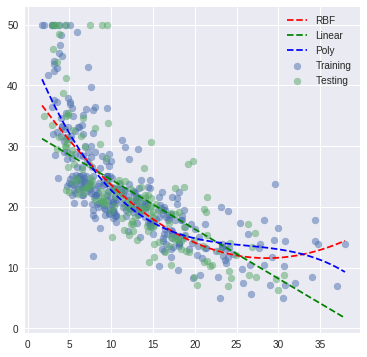

In [16]:
# Preparamos datos
X = df["LSTAT"].values.reshape(-1, 1)
y = df["MEDV"].values.reshape(-1, 1)

from sklearn.preprocessing import MinMaxScaler
X_scaler = MinMaxScaler()
y_scaler = MinMaxScaler()
X = X_scaler.fit_transform(X)
y = y_scaler.fit_transform(y)

# Creamos un split de datos
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=100)


from sklearn.svm import SVR
plt.style.use("seaborn")
plt.figure(figsize=(6,6))


svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
svr_lin = SVR(kernel='linear', C=100, gamma='auto')
svr_poly = SVR(kernel='poly', C=100, gamma='auto', degree=3, epsilon=.1, coef0=1)

# Creamos un scatter plot con los datos de entrenamiento
plt.scatter(X_scaler.inverse_transform(X_train), y_scaler.inverse_transform(y_train.reshape(-1,1)),label="Training",alpha=0.5)
# Creamos un scatter plot con los datos de validación
plt.scatter(X_scaler.inverse_transform(X_test), y_scaler.inverse_transform(y_test.reshape(-1,1)),label="Testing",alpha=0.5)
# En X_plot guardamos valores distribuidos entre 0 y 1
X_plot = np.linspace(0,1).reshape(-1, 1)
    
for name, svr, s in zip(["RBF","Linear","Poly"],[svr_rbf,svr_lin,svr_poly],["r--","g--","b--"]):
    svr.fit(X_train,y_train.reshape(-1))
    y_train_hat = svr.predict(X_train)
    y_test_hat = svr.predict(X_test)    
    # Con el modelo predecimos X_plot
    y_plot = svr.predict(X_plot)
    # Graficamos el modelo
    plt.plot(X_scaler.inverse_transform(X_plot), y_scaler.inverse_transform(y_plot.reshape(-1,1)), s,label=name)
    # Calculamos el error
    print(name, "Entrenamiento", r2_score(y_train, y_train_hat))
    print(name, "Prueba", r2_score(y_test, y_test_hat))
    print("----")

plt.legend();